<h1><center>Chess Dataset Analysis</center></h1>

<center><img src='http://www.scuolafilosofica.com/wp-content/uploads/2019/04/boy-2756201_1920-1.jpg'></center>


* Obatained from lichess online chess gaming website through kaggle.
* Dataset was provide on kaggle website courtsey of user **Mitchell J**.


In [1]:
import  pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling


In [45]:
import plotly.graph_objects as go

In [2]:
sns.set_style('darkgrid')

In [3]:
chess=pd.read_csv('chessgames.csv')

In [9]:
chess.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,mean_rating,rating_diff
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5,61
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1498.0,4


In [10]:
chess.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,mean_rating,rating_diff
count,1.615500e+04,1.615500e+04,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000
mean,1.483600e+12,1.483601e+12,61.962550,1597.102012,1593.503188,4.814361,1595.302600,153.746642
std,2.857839e+10,2.857839e+10,33.732775,284.178397,289.627160,2.767543,265.271855,155.497064
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000,816.500000,0.000000
25%,1.477393e+12,1.477394e+12,39.000000,1396.000000,1390.000000,3.000000,1405.750000,41.000000
50%,1.496360e+12,1.496360e+12,57.000000,1577.000000,1573.000000,4.000000,1574.000000,103.000000
75%,1.503260e+12,1.503260e+12,80.000000,1794.000000,1791.000000,6.000000,1776.000000,216.000000
max,1.504493e+12,1.504494e+12,349.000000,2622.000000,2588.000000,28.000000,2475.500000,1290.000000


In [8]:
chess = chess[chess.rated]  # only rated games
chess['mean_rating'] = (chess.white_rating + chess.black_rating) / 2
chess['rating_diff'] = abs(chess.white_rating - chess.black_rating)

In [11]:
chess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16155 entries, 1 to 20057
Data columns (total 18 columns):
id                16155 non-null object
rated             16155 non-null bool
created_at        16155 non-null float64
last_move_at      16155 non-null float64
turns             16155 non-null int64
victory_status    16155 non-null object
winner            16155 non-null object
increment_code    16155 non-null object
white_id          16155 non-null object
white_rating      16155 non-null int64
black_id          16155 non-null object
black_rating      16155 non-null int64
moves             16155 non-null object
opening_eco       16155 non-null object
opening_name      16155 non-null object
opening_ply       16155 non-null int64
mean_rating       16155 non-null float64
rating_diff       16155 non-null int64
dtypes: bool(1), float64(3), int64(5), object(9)
memory usage: 2.2+ MB


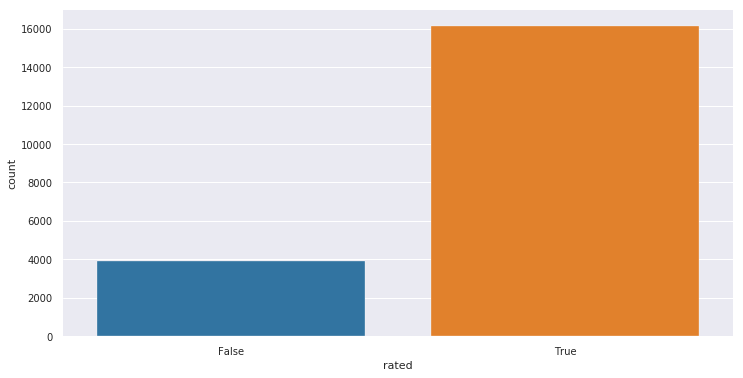

In [6]:
plt.figure(1,figsize=(12,6))
sns.countplot(x='rated',data=chess)

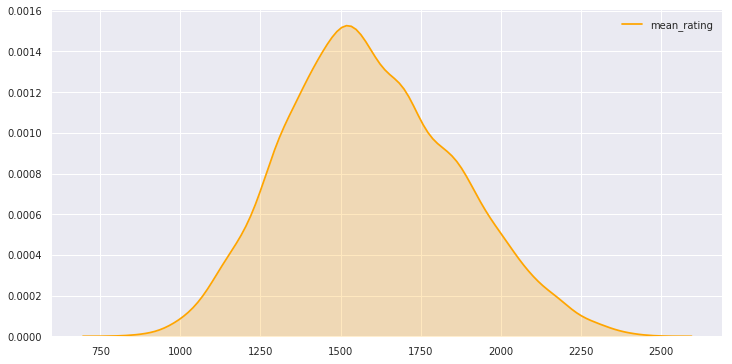

In [22]:
plt.figure(1,figsize=(12,6))
sns.kdeplot(chess.mean_rating,shade=True,color='orange')

In [310]:
winner=chess.winner.value_counts()
fig = go.Figure(data=[go.Pie(labels=winner.index, values=winner,hole=0.2)])
fig.show()


<center><img src='https://i.ibb.co/dMyfdYR/newplot-5.png'></center>

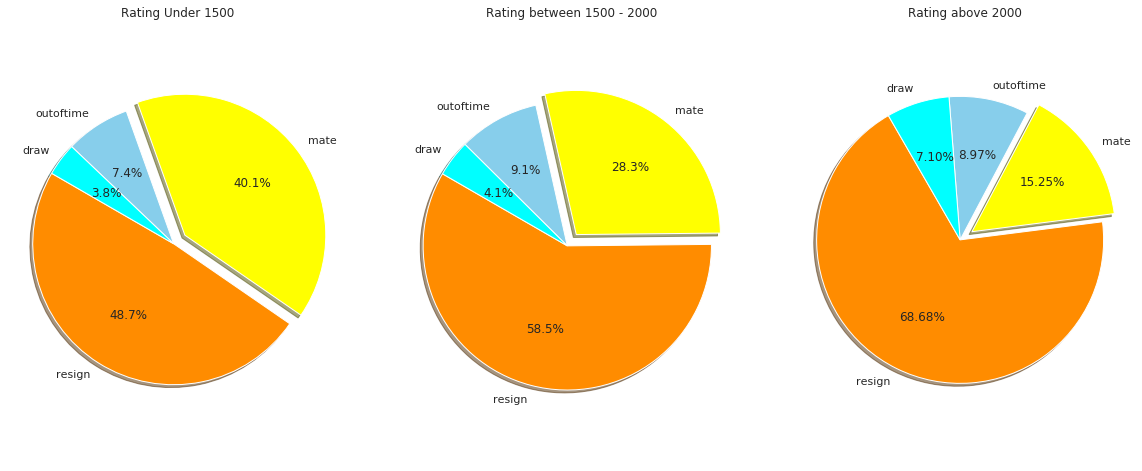

In [307]:
victory_status=chess[chess.mean_rating<1500].victory_status.value_counts()
victory_status1=chess[(chess.mean_rating>1500)&(chess.mean_rating<2000)].victory_status.value_counts()
victory_status2=chess[chess.mean_rating>2000].victory_status.value_counts()
colors=['darkorange','yellow','skyblue','cyan']
explode = (0, 0.1, 0,0)
plt.figure(1,figsize=(20,8))
plt.subplot(131)
plt.pie(victory_status, explode=explode,colors=colors,labels=victory_status.index,autopct='%1.1f%%',
        shadow=True,startangle=150)
plt.axis('equal')
plt.title('Rating Under 1500')
plt.subplot(132)
plt.pie(victory_status1, explode=explode,colors=colors,labels=victory_status1.index,autopct='%1.1f%%',
        shadow=True,startangle=150)
plt.axis('equal')
plt.title('Rating between 1500 - 2000')
plt.subplot(133)
plt.pie(victory_status2, explode=explode,colors=colors,labels=victory_status2.index,autopct='%1.2f%%',
        shadow=True,startangle=120)
plt.axis('equal')
plt.title('Rating above 2000')
plt.show()

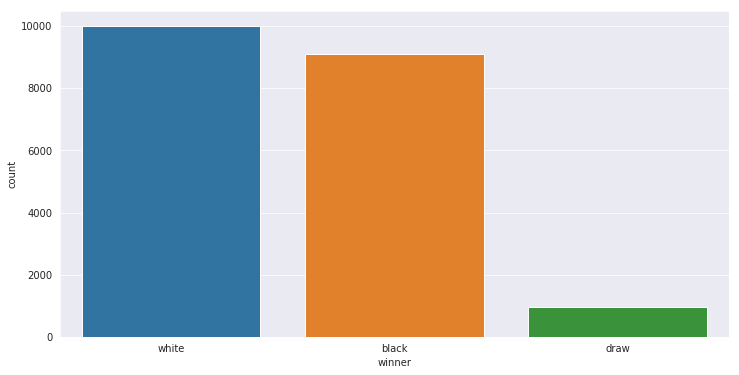

In [124]:
plt.figure(1,figsize=(12,6))
sns.countplot(x='winner',data=chess)

In [ ]:
plt.figure(1,figsize=(12,6))
sns.countplot(x='rated',data=chess[chess.])

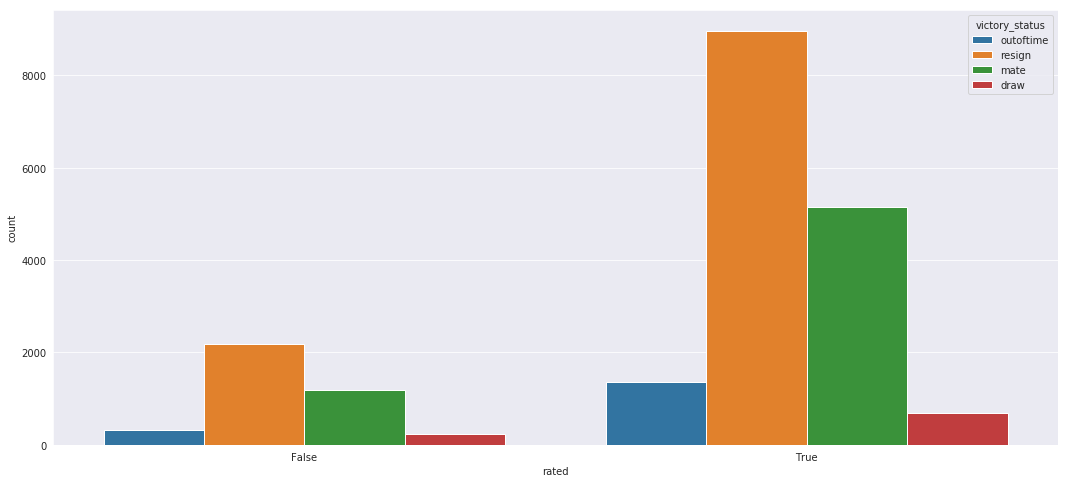

In [121]:
plt.figure(1,figsize=(18,8))
sns.countplot(x='rated',data=chess,hue='victory_status')

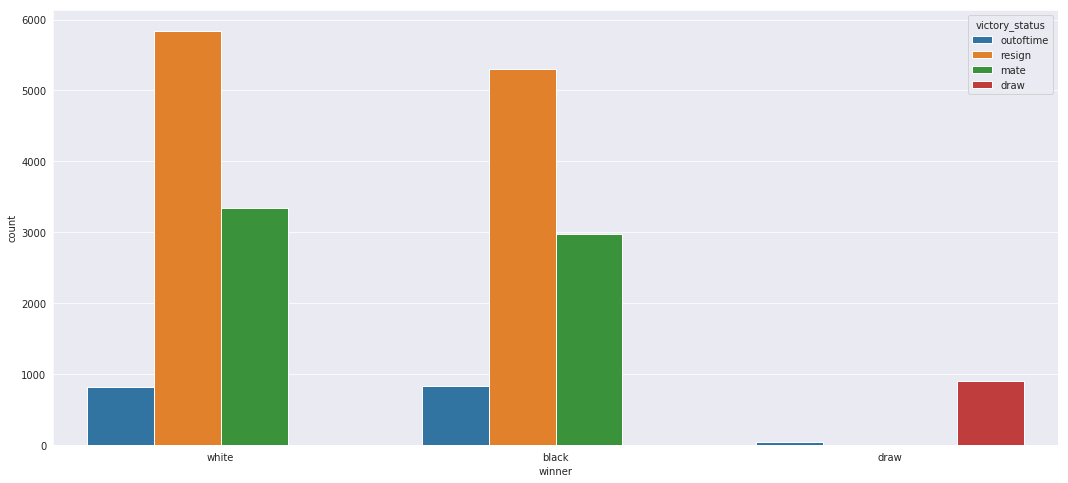

In [142]:
plt.figure(1,figsize=(18,8))
sns.countplot(x='winner',data=chess,hue='victory_status')

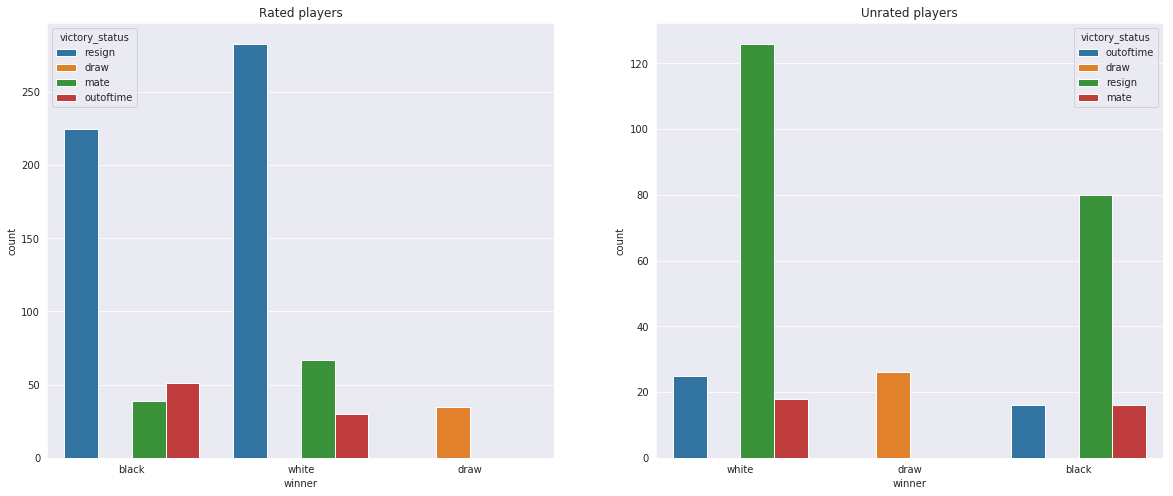

In [132]:
plt.figure(1,figsize=(20,8))
plt.subplot(121)
sns.countplot(x='winner',data=chess[(chess.turns<15)&(chess.rated==True)],hue='victory_status')
plt.title('Rated players')
plt.subplot(122)
sns.countplot(x='winner',data=chess[(chess.turns<15)&(chess.rated==False)],hue='victory_status')
plt.title('Unrated players')
plt.show()

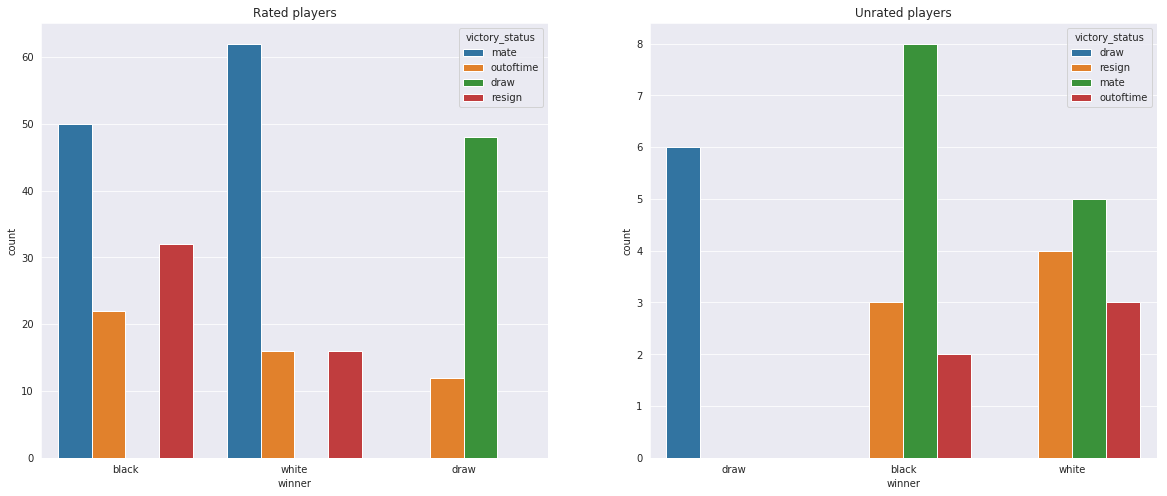

In [137]:
plt.figure(1,figsize=(20,8))
plt.subplot(121)
sns.countplot(x='winner',data=chess[(chess.turns>150)&(chess.rated==True)],hue='victory_status')
plt.title('Rated players')
plt.subplot(122)
sns.countplot(x='winner',data=chess[(chess.turns>150)&(chess.rated==False)],hue='victory_status')
plt.title('Unrated players')
plt.show()

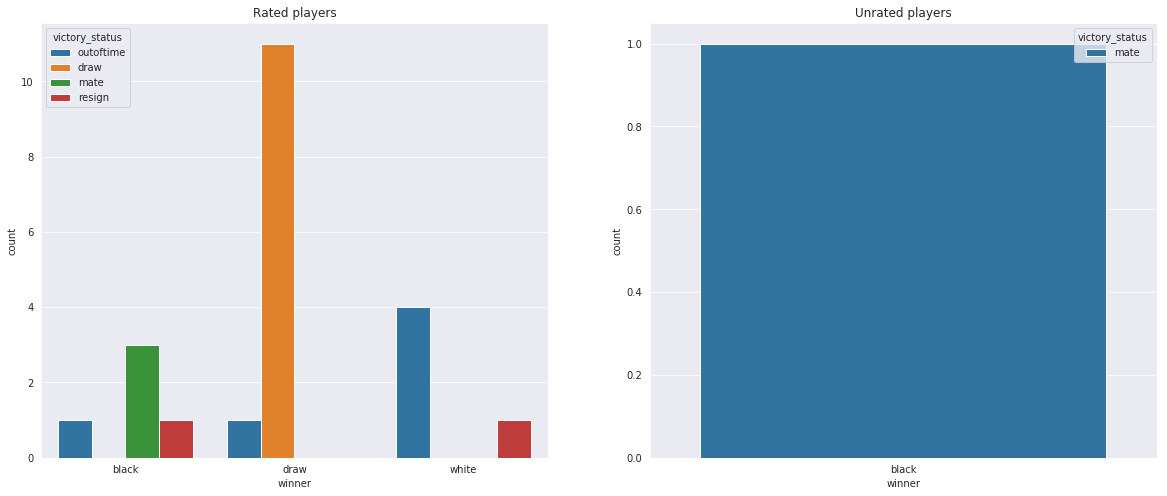

In [145]:
plt.figure(1,figsize=(20,8))
plt.subplot(121)
sns.countplot(x='winner',data=chess[(chess.turns>200)&(chess.rated==True)],hue='victory_status')
plt.title('Rated players')
plt.subplot(122)
sns.countplot(x='winner',data=chess[(chess.turns>200)&(chess.rated==False)],hue='victory_status')
plt.title('Unrated players')
plt.show()

In [127]:
chess.head(2)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,mean_rating,rating_diff
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,1291.5,61
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1498.0,4


In [24]:
dfwhite=chess[chess.winner=='white']

In [25]:
dfblack=chess[chess.winner=='black']

In [26]:
dfdraw=chess[chess.winner=='draw']

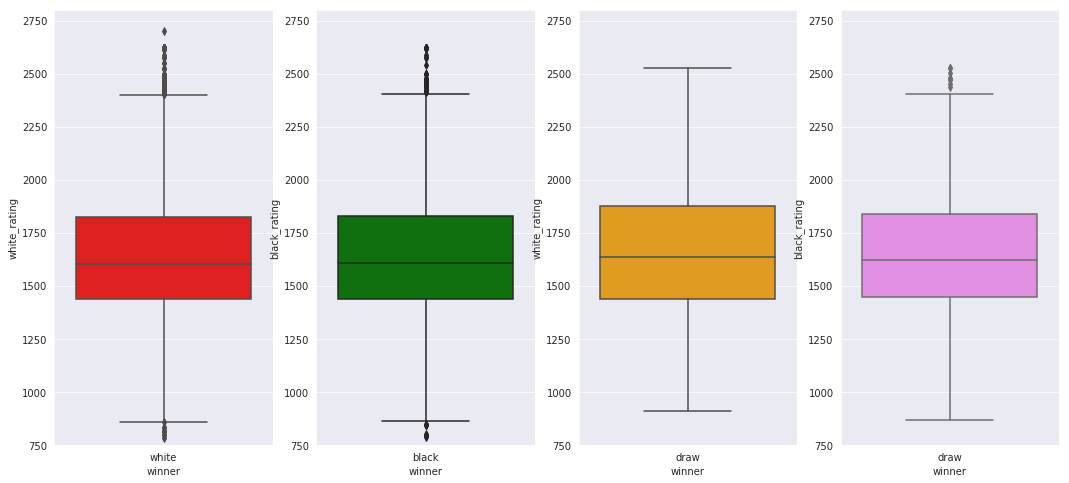

In [98]:
plt.figure(1,figsize=(18,8))
plt.subplot(141)
sns.boxplot(x='winner',y='white_rating',data=dfwhite,color='red')
plt.ylim(750,2800)
plt.subplot(142)
sns.boxplot(x='winner',y='black_rating',data=dfblack,color='green')
plt.ylim(750,2800)
plt.subplot(143)
sns.boxplot(x='winner',y='white_rating',data=dfdraw,color='orange')
plt.ylim(750,2800)
plt.subplot(144)
sns.boxplot(x='winner',y='black_rating',data=dfdraw,color='violet')
plt.ylim(750,2800)
plt.show()


(28, 49)

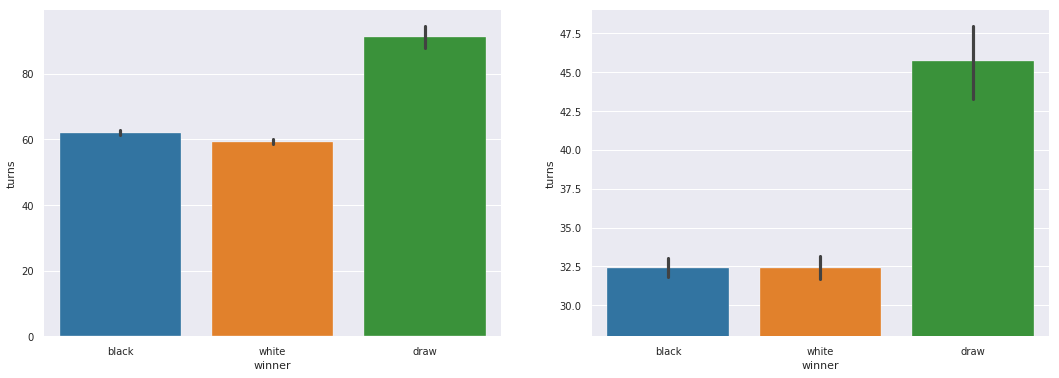

In [123]:
plt.figure(1,figsize=(18,6))
plt.subplot(121)
sns.barplot(x='winner',y='turns',data=chess,estimator=np.mean)
#plt.ylim(55,100)
plt.title("avrage games lasted about 62 moves")
plt.subplot(122)
sns.barplot(x='winner',y='turns',data=chess,estimator=np.std)
plt.ylim(28,49)
plt.title("standard deviation of ")

In [39]:
chess.turns.mean()

61.96255029402662

In [38]:
chess[(chess.winner=='white')|(chess.winner=='black')].turns.mean()

60.60216377299819

In [126]:
king=chess.groupby('winner')
king.turns.std()

winner
black    32.420766
draw     45.727494
white    32.397917
Name: turns, dtype: float64

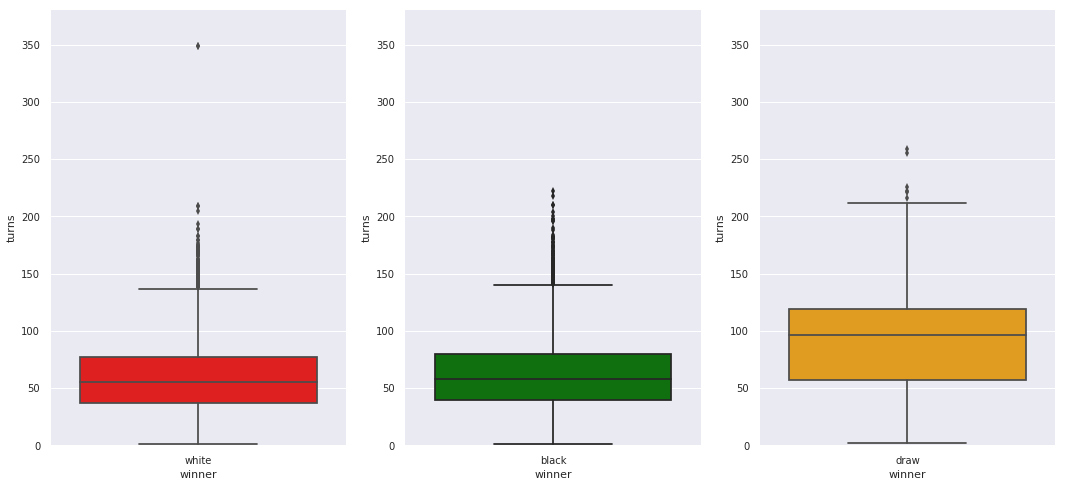

In [30]:
plt.figure(1,figsize=(18,8))
plt.subplot(131)
sns.boxplot(x='winner',y='turns',data=dfwhite,color='red')
plt.ylim(0,380)
plt.subplot(132)
sns.boxplot(x='winner',y='turns',data=dfblack,color='green')
plt.ylim(0,380)
plt.subplot(133)
sns.boxplot(x='winner',y='turns',data=dfdraw,color='orange')
plt.ylim(0,380)

plt.show()


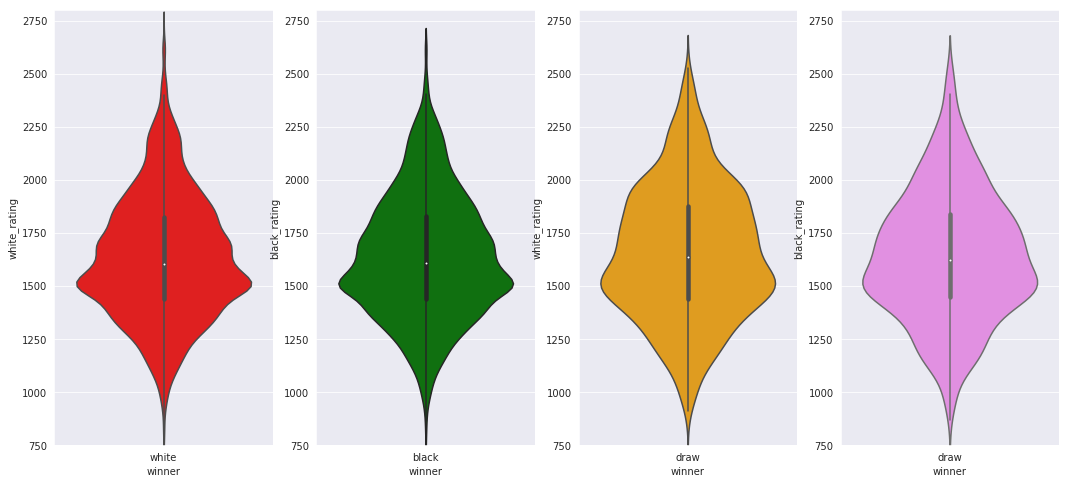

In [99]:
plt.figure(1,figsize=(18,8))
plt.subplot(141)
sns.violinplot(x='winner',y='white_rating',data=dfwhite,color='red')
plt.ylim(750,2800)
plt.subplot(142)
sns.violinplot(x='winner',y='black_rating',data=dfblack,color='green')
plt.ylim(750,2800)
plt.subplot(143)
sns.violinplot(x='winner',y='white_rating',data=dfdraw,color='orange')
plt.ylim(750,2800)
plt.subplot(144)
sns.violinplot(x='winner',y='black_rating',data=dfdraw,color='violet')
plt.ylim(750,2800)
plt.show()


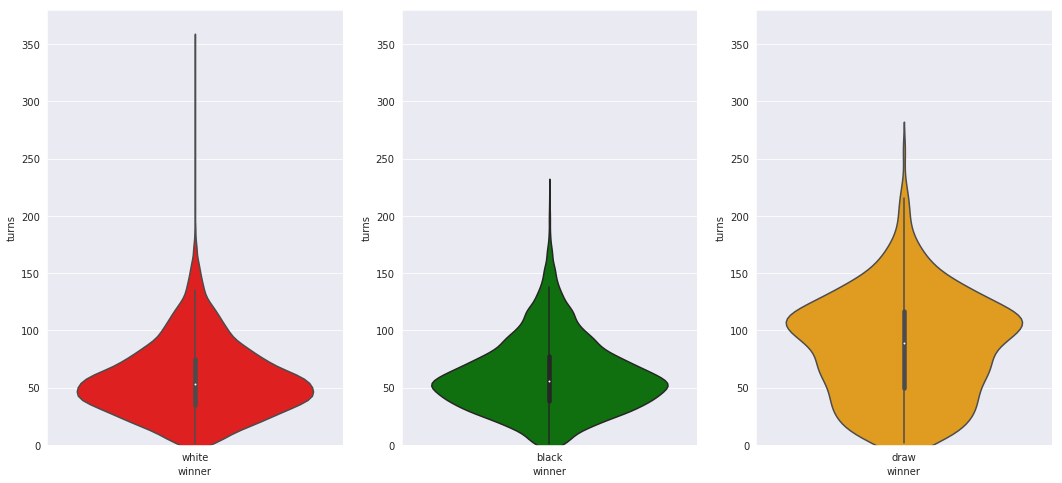

In [134]:
plt.figure(1,figsize=(18,8))
plt.subplot(131)
sns.violinplot(x='winner',y='turns',data=dfwhite,color='red')
plt.ylim(0,380)
plt.subplot(132)
sns.violinplot(x='winner',y='turns',data=dfblack,color='green')
plt.ylim(0,380)
plt.subplot(133)
sns.violinplot(x='winner',y='turns',data=dfdraw,color='orange')
plt.ylim(0,380)

plt.show()


In [312]:
fig1 = px.density_heatmap(chess[(chess.winner=='white')|(chess.winner=='black')], x="white_rating", y="black_rating", marginal_x="violin", marginal_y="histogram",
                          title='Density heatmap of White and Black rating where Game ended in a Win')
fig1.show()


<center><img src='https://i.ibb.co/dGvr902/newplot-4.png'></center

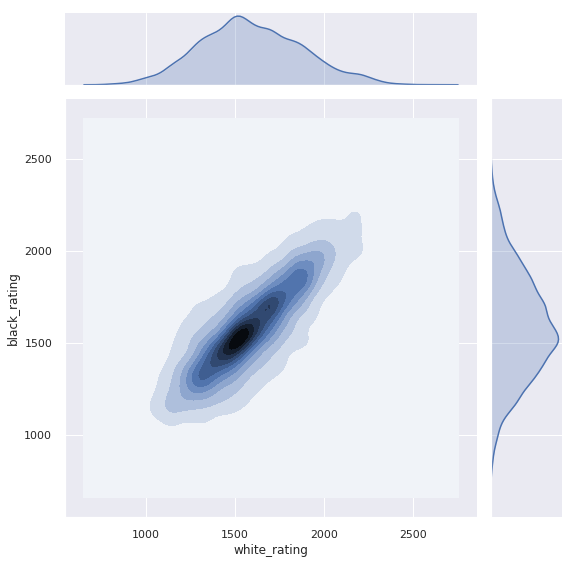

In [255]:
#plt.figure(1,figsize=(10,8))
sns.jointplot(x='white_rating',y='black_rating',height=8,data=chess[(chess.winner=='white')|(chess.winner=='black')],kind='kde')
plt.show()

##### Below 3D scatter plots were made using plotly-express and than downloaded as png.

<h2>
    <center>Majority games that lasted more than 200 turns ended draw.</center>
</h2>
<center><img src='https://i.ibb.co/P63jHgF/newplot6.png'></center>

<h2>
    <center>Majority games that lasted less than 100 turns ended with a conclusive win.</center>
</h2>
<center><img src='https://i.ibb.co/DwNCFbD/newplot-7.png'></center>

<h2>
    <center>Majority games that lasted less than 15 turns were won becuase of resign likely opponent made a big blunder.</center>
</h2>
<center><img src='https://i.ibb.co/nDYg03S/newplot-10.png'></center>

<h2>
    <center>Majority games that lasted less than 80 turns were won becuase of resign.</center>
</h2>
<center><img src='https://i.ibb.co/5KbnLJw/newplot-11.png'></center>

* Mate rarely happens opponents tends to resign if they see there is no path forward.

# Scholar's Mate

In [168]:
chess[(chess.victory_status=='mate')&(chess.turns==4)&((chess.winner=='white')|(chess.winner=='black'))]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,mean_rating,rating_diff
847,inyTCeV2,True,1.501670e+12,1.501670e+12,4,mate,black,10+0,duckduckfrog,1527,ducksandcats,1861,f4 e6 g4 Qh4#,A02,Bird Opening,1,1694.0,334
862,eP09Yv7W,True,1.500090e+12,1.500090e+12,4,mate,black,10+0,duckduckfrog,1527,smartduckduckcow,1882,f4 e6 g4 Qh4#,A02,Bird Opening,1,1704.5,355
864,V7a3QIoB,True,1.499910e+12,1.499910e+12,4,mate,black,10+0,duckduckfrog,1533,smartduckduckcow,1897,f4 e6 g4 Qh4#,A02,Bird Opening,1,1715.0,364
867,pSa9EQDs,True,1.499910e+12,1.499910e+12,4,mate,black,10+0,duckduckfrog,1552,smartduckduckcow,1887,f4 e6 g4 Qh4#,A02,Bird Opening,1,1719.5,335
12294,eP09Yv7W,True,1.500085e+12,1.500085e+12,4,mate,black,10+0,duckduckfrog,1527,smartduckduckcow,1882,f4 e6 g4 Qh4#,A02,Bird Opening,1,1704.5,355
12296,V7a3QIoB,True,1.499905e+12,1.499905e+12,4,mate,black,10+0,duckduckfrog,1533,smartduckduckcow,1897,f4 e6 g4 Qh4#,A02,Bird Opening,1,1715.0,364
12299,pSa9EQDs,True,1.499905e+12,1.499905e+12,4,mate,black,10+0,duckduckfrog,1552,smartduckduckcow,1887,f4 e6 g4 Qh4#,A02,Bird Opening,1,1719.5,335
12324,inyTCeV2,True,1.501666e+12,1.501666e+12,4,mate,black,10+0,duckduckfrog,1527,ducksandcats,1861,f4 e6 g4 Qh4#,A02,Bird Opening,1,1694.0,334
14303,eP09Yv7W,True,1.500085e+12,1.500085e+12,4,mate,black,10+0,duckduckfrog,1527,smartduckduckcow,1882,f4 e6 g4 Qh4#,A02,Bird Opening,1,1704.5,355
14305,V7a3QIoB,True,1.499905e+12,1.499905e+12,4,mate,black,10+0,duckduckfrog,1533,smartduckduckcow,1897,f4 e6 g4 Qh4#,A02,Bird Opening,1,1715.0,364


* I wanted to how many scholar's mates are there but I saw quite different picture.
* Here same two players are playing game in 4 moves.
* Means someone is artificially trying to inflate his rating.
* Here you can see [SMARTduckduckcow](https://lichess.org/@/SMARTduckduckcow) and [duckduckfrog](https://lichess.org/@/duckduckfrog) profile, they been banned from lichess.

In [169]:
white_upsets = chess[(chess.winner == 'white') & (chess.white_rating < chess.black_rating)]
black_upsets = chess[(chess.winner == 'black') & (chess.black_rating < chess.white_rating)]
upsets = pd.concat([white_upsets, black_upsets])

In [174]:
End = 900
Start = 50

u_percentages = []

print(f'Ratings difference : Percentage of wins by weak players')
for i in range(0+Start, End, Start):
    th_upsets = upsets[upsets.rating_diff > i]
    th_chess = chess[chess.rating_diff > i]
    upsets_percentage = (th_upsets.shape[0] / th_chess.shape[0]) * 100
    u_percentages.append([i, upsets_percentage])
    print(f'{str(i).ljust(18)}:  {upsets_percentage:.2f}%')

Ratings difference : Percentage of wins by weak players
50                :  28.40%
100               :  24.34%
150               :  20.98%
200               :  17.67%
250               :  15.65%
300               :  13.28%
350               :  11.59%
400               :  10.88%
450               :  10.73%
500               :  10.37%
550               :  9.60%
600               :  9.88%
650               :  8.75%
700               :  5.17%
750               :  4.59%
800               :  2.56%
850               :  2.38%


## Upsets here are defined as when a low rated player defeated a high rated player.

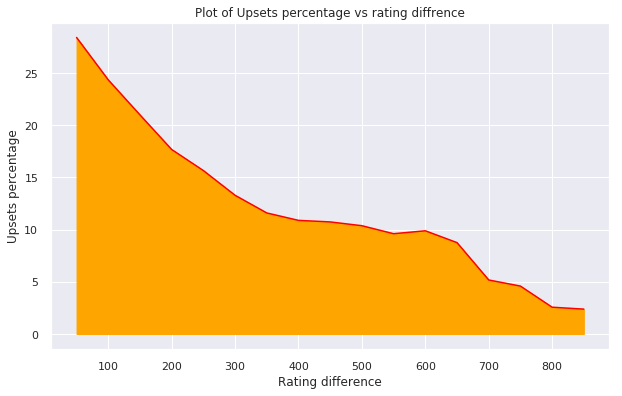

In [254]:
line_dict={}
Up=[]
rat=[]
for i in u_percentages:
    Up.append(i[1])
    line_dict[i[0]]=i[1]
    rat.append(i[0])

plt.figure(figsize=(10,6))
sns.lineplot(rat,Up,color='red')
plt.fill_between(rat,Up,color='orange')
plt.xlabel('Rating difference')
plt.ylabel('Upsets percentage')
plt.title('Plot of Upsets percentage vs rating diffrence')
plt.show()

#### Chance of the weak player to win a game against high rated player is, naturally, decreasing as the rating difference between them increases.

In [216]:
import re

In [217]:
p = re.compile('([a-h][1-8])')
squares = {}
for moves in chess.moves:
    for move in moves.split():
        try:
            square = re.search(p, move).group()
        except AttributeError:  # castling
            square = move.replace('+', '')
        squares[square] = squares.get(square, 0) + 1

In [218]:
squares_df = pd.DataFrame.from_dict(squares, orient='index', columns=['count'])


# add castling

total_shorts = int(squares_df.loc['O-O'])
total_longs = int(squares_df.loc['O-O-O'])

half_shorts = total_shorts//2
half_longs = total_longs//2

# white short castling
squares_df.loc['f1'] = squares_df.loc['f1'] + half_shorts
squares_df.loc['g1'] = squares_df.loc['g1'] + half_shorts
# black short castling
squares_df.loc['f8'] = squares_df.loc['f8'] + half_shorts
squares_df.loc['g8'] = squares_df.loc['g8'] + half_shorts 
# white long castling
squares_df.loc['c1'] = squares_df.loc['c1'] + half_longs
squares_df.loc['d1'] = squares_df.loc['d1'] + half_longs
# black long castling
squares_df.loc['c8'] = squares_df.loc['c8'] + half_longs
squares_df.loc['d8'] = squares_df.loc['d8'] + half_longs

squares_df.drop(['O-O', 'O-O-O'], inplace=True)


In [219]:
total_castles = total_shorts + total_longs
print(f'Short: {(total_shorts/total_castles)*100:.2f}%')
print(f'Long: {(total_longs/total_castles)*100:.2f}%')

Short: 86.15%
Long: 13.85%


In [275]:
labels=['Short Castle', 'Long Castle']
values=[86.15,13.84]


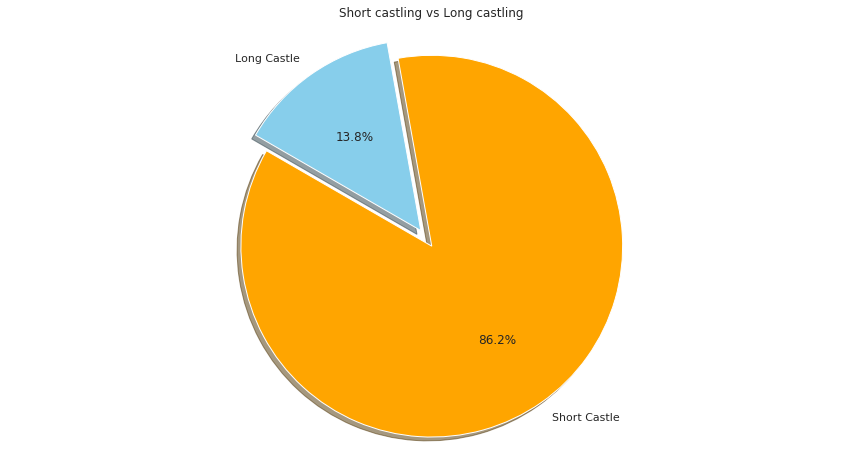

In [276]:
plt.figure(1,figsize=(15,8))
explode=(0,0.1)
colors=('orange','skyblue')
plt.pie(values, explode=explode,labels=labels,autopct='%1.1f%%',
        shadow=True,startangle=150,colors=colors)
plt.axis('equal')
plt.title('Short castling vs Long castling')
plt.show()

* To extract moves and and organize below matrix was courtsey of kaggle user [**Tianmin**](https://www.kaggle.com/thecrossed).

In [241]:
squares_df = squares_df.pivot('number', 'letter', 'count')
squares_df.sort_index(level=0, ascending=False, inplace=True)  # to get right chessboard orientation
squares_df

letter,a,b,c,d,e,f,g,h
number,,,,,,,,
8,4063,6093,9826,13434,11582,18189,15073,4927
7,4437,8637,9657,19211,20615,10416,10701,5540
6,11788,12842,31156,22162,22742,35178,15637,13177
5,11576,19415,23504,38533,38292,19785,21656,12710
4,11554,17672,25414,39904,36098,20803,19962,12294
3,10702,12857,30298,20419,19389,35605,14395,12184
2,4318,7702,9358,17885,17539,9145,8461,5458
1,3850,6164,9353,13113,12118,17568,14566,4671


<h1>
    <center>One of the Objectives in chess: Control the Centre.</center>
</h1>
<center><img src='https://chessfox.com/wp-content/uploads/2016/02/centre-control-objective-in-chess.png'></center>

<h4>
    <center>The objective is that you should try to control the central squares of chess board and centralize your pieces in and around the center.</center>
</h4>

<center><img src='https://chessfox.com/wp-content/uploads/2016/02/centre-control-objective-in-chess-2.png'></center


## Heatmap of squares occupancy.

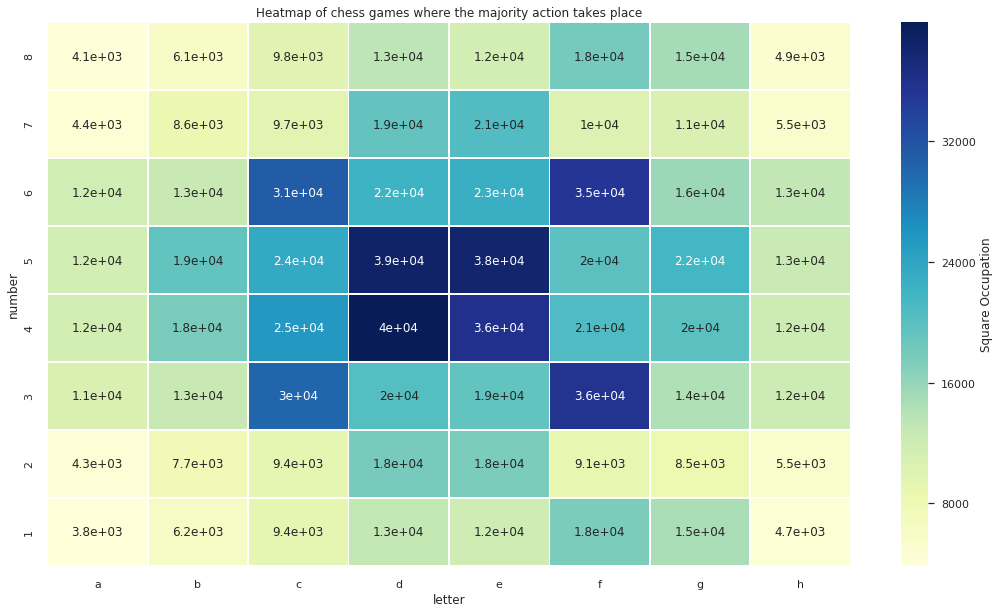

In [301]:
plt.figure(1,figsize=(18,10))
sns.heatmap(squares_df,cmap="YlGnBu",annot=True,linewidth=0.8,cbar_kws={'label':'Square Occupation'})
plt.title("Heatmap of chess games where the majority action takes place")
plt.show()

### As you can see by heatmap majority of action takes place in middle of chessboard.
* In chess  aim to control the squares in the middle of the board is very important for the game.
#### The objective of center control can be stated as:

* Aim to control central squares with your pieces and pawns because the central squares are the most important squares on the board.
* If you control the center you will generally also be able to exert more control over the rest of the board.

* Importance of above strategy can be proved by the above occupancy heatmap of chess board.

In [138]:
chess_corr.corr()

,turns,white_rating,black_rating,opening_ply,mean_rating,rating_diff
turns,1.000000,0.147811,0.170288,0.055174,0.172134,-0.120007
white_rating,0.147811,1.000000,0.709764,0.285029,0.923101,-0.002490
black_rating,0.170288,0.709764,1.000000,0.271603,0.926082,0.004424
opening_ply,0.055174,0.285029,0.271603,1.000000,0.300942,-0.037737
mean_rating,0.172134,0.923101,0.926082,0.300942,1.000000,0.001082
rating_diff,-0.120007,-0.002490,0.004424,-0.037737,0.001082,1.000000


## Co-relation map between 'turns','white_rating','black_rating','opening_ply','mean_rating','rating_diff'.

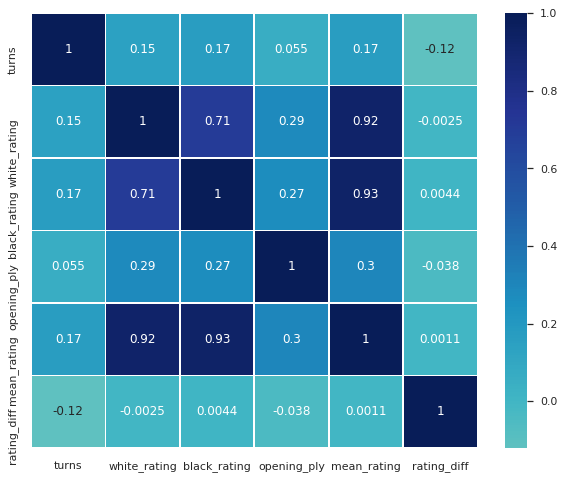

In [308]:
plt.figure(1,figsize=(10,8))
chess_corr=chess[['turns','white_rating','black_rating','opening_ply','mean_rating','rating_diff']]
sns.heatmap(chess_corr.corr(),cmap="YlGnBu",center=0,annot=True,linewidth=0.8)
plt.show()


In [ ]:
opening=list(chess.opening_name.unique())

In [172]:
len(opeing)

1477

In [ ]:
opening_eco=list(chess.opening_eco.unique())

In [179]:
len(opening_eco)

365

In [168]:
chess.opening_eco.mode()

0    A00
dtype: object

# A00 Polish (Sokolsky) opening         1. b4


In [180]:
chess.opening_name.mode()

0    Van't Kruijs Opening
dtype: object

In [181]:
chess[chess.winner=='black'].opening_eco.mode()

0    A00
dtype: object

In [177]:
chess[chess.winner=='white'].opening_eco.mode()

0    C00
dtype: object

# C00-C19 French defence________1. e4 e6

In [182]:
chess[chess.winner=='white'].opening_name.mode()

0    Scandinavian Defense: Mieses-Kotroc Variation
dtype: object

In [187]:
chess[chess.winner=='black'].opening_name.mode()

0    Van't Kruijs Opening
dtype: object

In [186]:
print(chess[chess.rated==True].opening_eco.mode())
print(chess[chess.rated==False].opening_eco.mode())

0    A00
dtype: object
0    A00
dtype: object


In [185]:
chess[chess.rated==False].opening_eco.mode()

0    A00
dtype: object

(175, 380)

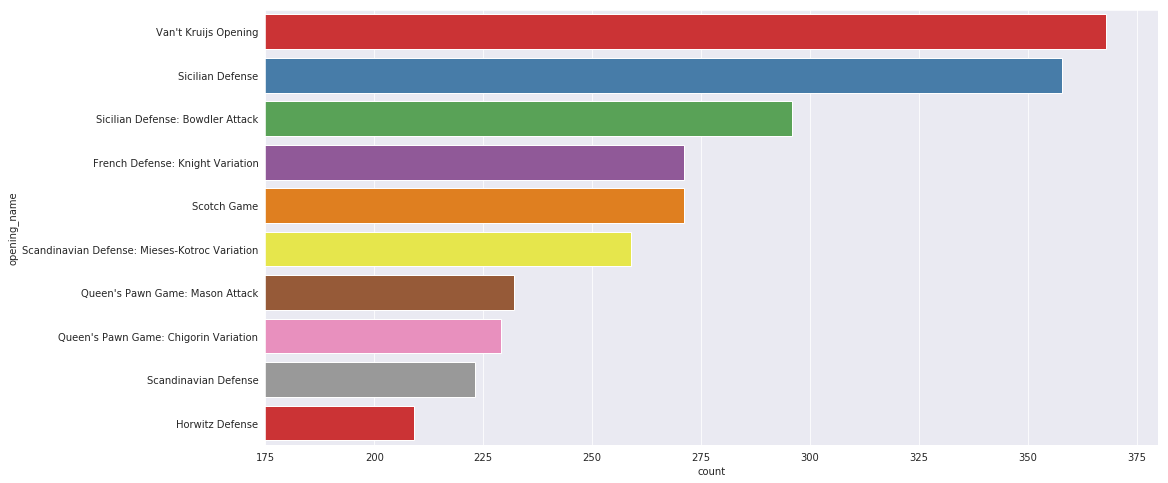

In [224]:
plt.figure(figsize=(16,8))
plot = sns.countplot(y ="opening_name",data=chess,order=chess['opening_name'].value_counts().iloc[:10].index, palette = "Set1")
plt.xlim(175,380)

(155, 310)

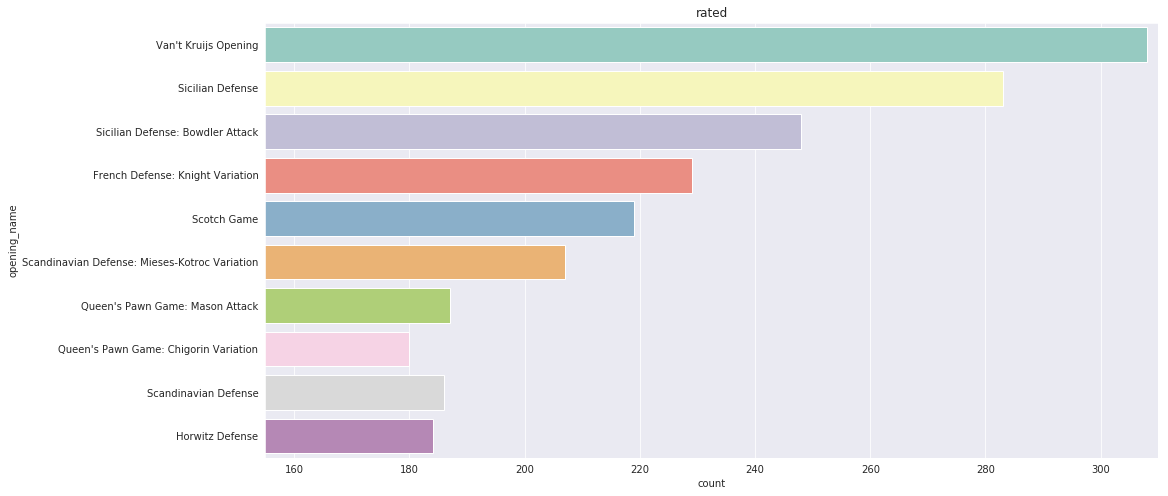

In [222]:
plt.figure(figsize=(16,8))

plot = sns.countplot(y ="opening_name",data=chess[chess.rated==True],order=chess['opening_name'].value_counts().iloc[:10].index, palette = "Set3")
plt.title('rated')
plt.xlim(155,310)

(15, 80)

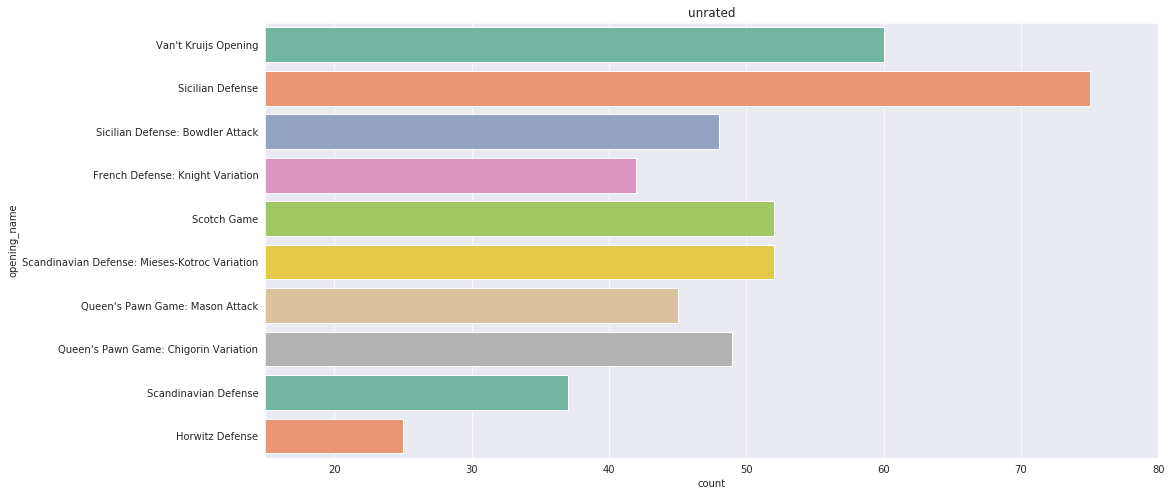

In [220]:
plt.figure(figsize=(16,8))
plot = sns.countplot(y ="opening_name",data=chess[chess.rated==False],order=chess['opening_name'].value_counts().iloc[:10].index, palette = "Set2")
plt.title('unrated')
plt.xlim(15,80)

(75, 170)

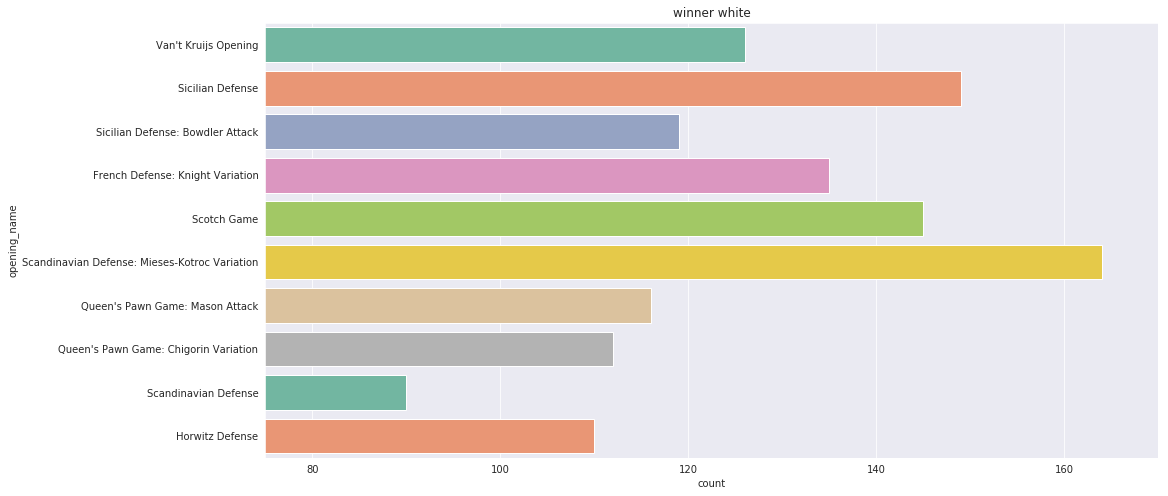

In [219]:
plt.figure(figsize=(16,8))
plot = sns.countplot(y ="opening_name",data=chess[chess.winner=='white'],order=chess['opening_name'].value_counts().iloc[:10].index, palette = "Set2")
plt.title('winner white')
plt.xlim(75,170)

(75, 230)

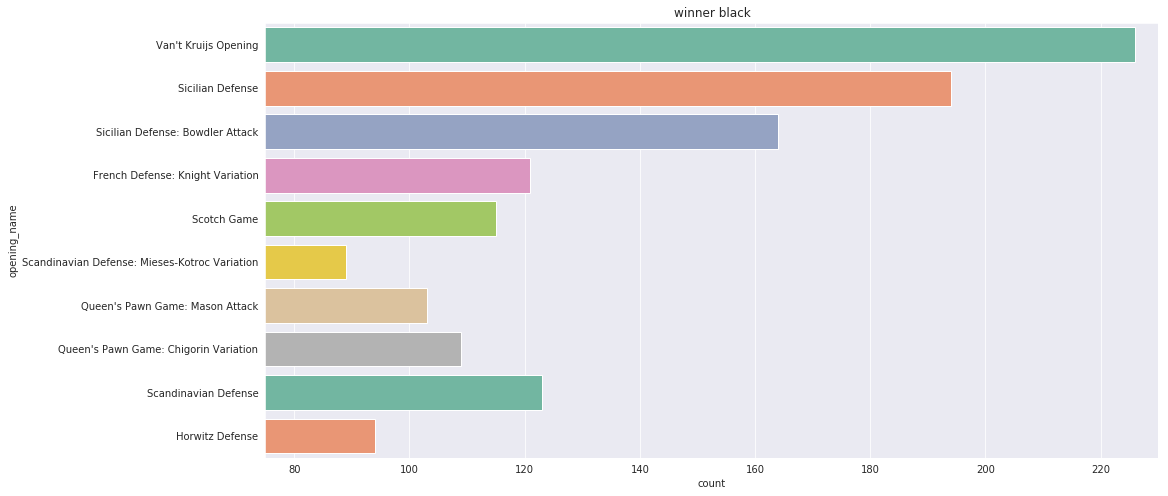

In [218]:
plt.figure(figsize=(16,8))
plot = sns.countplot(y ="opening_name",data=chess[chess.winner=='black'],order=chess['opening_name'].value_counts().iloc[:10].index, palette = "Set2")
plt.title('winner black')
plt.xlim(75,230)

Text(0.5, 1.0, 'most common opening eco')

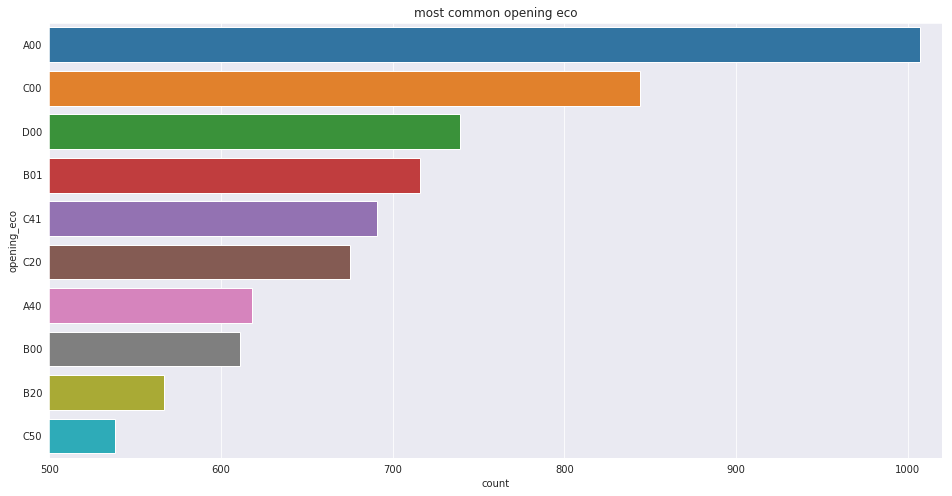

In [225]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
plot = sns.countplot(y ="opening_eco",data=chess,order=chess['opening_eco'].value_counts().iloc[:10].index)
plt.xlim(500,1020)
plt.title('most common opening eco')

Text(0.5, 1.0, 'most common opening eco where winner is white')

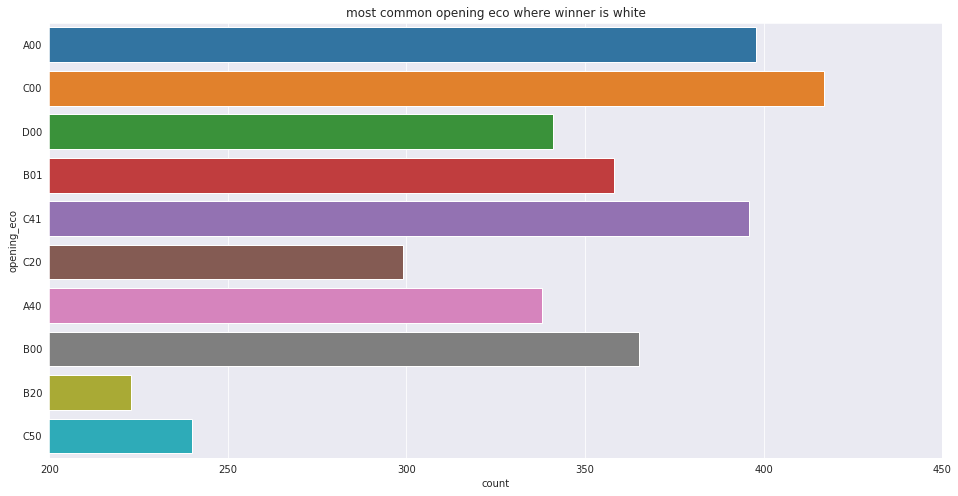

In [226]:
plt.figure(figsize=(16,8))
sns.set_style('darkgrid')
plot = sns.countplot(y ="opening_eco",data=chess[chess.winner=='white'],order=chess['opening_eco'].value_counts().iloc[:10].index)
plt.xlim(200,450)
plt.title('most common opening eco where winner is white')

# Summary

* Average game of chess lasted about 38 moves